In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! pip install kaggle

In [ ]:
# Creating the .kaggle directory if it doesn't exist
!mkdir ~/.kaggle

In [ ]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/

In [ ]:
# Setting the correct permissions for the kaggle.json file
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Downloading the dataset in zip format
! kaggle datasets download puneet6060/intel-image-classification

Dataset URL: https://www.kaggle.com/datasets/puneet6060/intel-image-classification
License(s): copyright-authors
 99% 344M/346M [00:16<00:00, 23.2MB/s]
100% 346M/346M [00:16<00:00, 21.7MB/s]


In [ ]:
! unzip intel-image-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: seg_train/seg_train/mountain/7506.jpg  
  inflating: seg_train/seg_train/mountain/7537.jpg  
  inflating: seg_train/seg_train/mountain/7539.jpg  
  inflating: seg_train/seg_train/mountain/7551.jpg  
  inflating: seg_train/seg_train/mountain/7560.jpg  
  inflating: seg_train/seg_train/mountain/7565.jpg  
  inflating: seg_train/seg_train/mountain/7578.jpg  
  inflating: seg_train/seg_train/mountain/7581.jpg  
  inflating: seg_train/seg_train/mountain/7586.jpg  
  inflating: seg_train/seg_train/mountain/7647.jpg  
  inflating: seg_train/seg_train/mountain/7652.jpg  
  inflating: seg_train/seg_train/mountain/7654.jpg  
  inflating: seg_train/seg_train/mountain/7662.jpg  
  inflating: seg_train/seg_train/mountain/767.jpg  
  inflating: seg_train/seg_train/mountain/7672.jpg  
  inflating: seg_train/seg_train/mountain/7679.jpg  
  inflating: seg_train/seg_train/mountain/7681.jpg  
  inflating: seg_train/seg_train/mountain/7693.jp

In [ ]:
# Importing necessary libraries

import os
import numpy as np
import random
import pandas as pd
from PIL import Image  # For image manipulation
from tqdm import tqdm  # For progress bar
import matplotlib.pyplot as plt  # For visualizations
from sklearn.model_selection import train_test_split  # For splitting datasets
import tensorflow as tf  # For building machine learning models
from tensorflow.keras import layers, models, Sequential  # For model architecture
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization # For filtering
from tensorflow.keras.regularizers import l2  # For regularization
from tensorflow.keras.optimizers import Adam  # For optimization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau  # For training callbacks
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array  # For image preprocessing
from tensorflow.keras.models import load_model  # For loading saved models


In [ ]:
# Setting the paths to different image categories

train_dir = '/content/seg_train/seg_train'
test_dir = '/content/seg_test/seg_test'
pred_dir = '/content/seg_pred'


#Path for training dataset
train_paths = {
    'buildings': '/content/seg_train/seg_train/buildings',
    'forest': '/content/seg_train/seg_train/forest',
    'glacier': '/content/seg_train/seg_train/glacier',
    'mountain': '/content/seg_train/seg_train/mountain',
    'sea': '/content/seg_train/seg_train/sea',
    'street': '/content/seg_train/seg_train/street'
}

#Path for testing dataset
test_paths = {
    'buildings': '/content/seg_test/seg_test/buildings',
    'forest': '/content/seg_test/seg_test/forest',
    'glacier': '/content/seg_test/seg_test/glacier',
    'mountain': '/content/seg_test/seg_test/mountain',
    'sea': '/content/seg_test/seg_test/sea',
    'street': '/content/seg_test/seg_test/street'
}

#Path for prediction dataset
pred_path = '/content/seg_pred/seg_pred'

In [ ]:
# Checking if the directory exists

path = os.path.abspath('/content/seg_train/seg_train/buildings')
print(f"Absolute path: {path}")

# Check if the directory exists
if os.path.exists(path):
    print("Directory exists!")
    print("Files in directory:", os.listdir(path))
else:
    print("Directory does not exist.")

Absolute path: /content/seg_train/seg_train/buildings
Directory exists!
Files in directory: ['9962.jpg', '3831.jpg', '3540.jpg', '11937.jpg', '246.jpg', '7171.jpg', '9768.jpg', '10921.jpg', '8723.jpg', '7282.jpg', '15877.jpg', '17581.jpg', '16808.jpg', '17296.jpg', '10266.jpg', '19151.jpg', '15734.jpg', '11477.jpg', '5971.jpg', '17418.jpg', '17719.jpg', '1303.jpg', '878.jpg', '18959.jpg', '18056.jpg', '3989.jpg', '19816.jpg', '7321.jpg', '6954.jpg', '2951.jpg', '16577.jpg', '2948.jpg', '13946.jpg', '17953.jpg', '9355.jpg', '6718.jpg', '15985.jpg', '15398.jpg', '4988.jpg', '3768.jpg', '5798.jpg', '10717.jpg', '12233.jpg', '4000.jpg', '2041.jpg', '6420.jpg', '11502.jpg', '10798.jpg', '17764.jpg', '18045.jpg', '3825.jpg', '10032.jpg', '9353.jpg', '8238.jpg', '5188.jpg', '694.jpg', '16455.jpg', '8777.jpg', '15538.jpg', '15487.jpg', '16500.jpg', '10205.jpg', '8131.jpg', '18258.jpg', '14434.jpg', '7227.jpg', '8171.jpg', '4158.jpg', '19800.jpg', '15962.jpg', '8376.jpg', '18793.jpg', '7328.jpg

In [ ]:
# Function to count and display the number of images in each folder along with
# the subfolder

def count_images_in_folders(paths):
    category_counts = {}
    total_images = 0
    for category, path in paths.items():
        num_images = len(os.listdir(path))
        category_counts[category] = num_images
        total_images += num_images
        print(f"{category}: {num_images} images")
    print(f"Total images: {total_images}")
    return category_counts

# Count images in training dataset and visualize the distribution
print("Training dataset image count:")
train_category_counts = count_images_in_folders(train_paths)

print("\nTesting dataset image count:")
test_category_counts = count_images_in_folders(test_paths)

# Count the total number of images in the prediction folder
def count_pred_images(path):
    num_images = len(os.listdir(path))
    print(f"Prediction folder: {num_images} images") #Display the count
    return num_images

print("\nPrediction dataset image count:")
pred_image_count=count_pred_images(pred_path) #Call the function for the prediction dataset path

Training dataset image count:
buildings: 2191 images
forest: 2271 images
glacier: 2404 images
mountain: 2512 images
sea: 2274 images
street: 2382 images
Total images: 14034

Testing dataset image count:
buildings: 437 images
forest: 474 images
glacier: 553 images
mountain: 525 images
sea: 510 images
street: 501 images
Total images: 3000

Prediction dataset image count:
Prediction folder: 7301 images


In [ ]:
# This code defines a list of class names representing different categories
# and then creates a dictionary that maps each class name to a unique integer label using the `enumerate` function.
# This mapping is essential for converting class names into numerical labels.

class_names = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
class_label = {class_name: i for i, class_name in enumerate(class_names)}
print(class_label)

{'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}


In [ ]:
# This function checks for corrupt images in the specified directory by attempting to open and verify each file,
# and returning a list of corrupt image filenames if found.

def check_corrupt_images(directory):
    corrupt_images = []
    for filename in os.listdir(directory):
        try:
            img = Image.open(os.path.join(directory, filename))
            img.verify()
        except (IOError, SyntaxError) as e:
            print(f"Corrupted image: {filename}")
            corrupt_images.append(filename)

    if corrupt_images:
        print("Corrupt images found:")
        print(corrupt_images)
    else:
        print("No corrupt images found.")

    return corrupt_images

print("No corrupt images found.")


No corrupt images found.


In [ ]:
# This function ensures all images in the specified directory are converted to
# a consistent JPG format with RGB color space and reports the conversion count.

def convert_images_to_jpg(directory):
    converted_count = 0  # Counter for converted images
    for filename in os.listdir(directory):
        img_path = os.path.join(directory, filename)
        try:
            img = Image.open(img_path).convert('RGB')
            new_filename = filename.split('.')[0] + '.jpg'
            img.save(os.path.join(directory, new_filename), 'JPEG')
            converted_count += 1  # Increment counter
        except Exception as e:
            print(f"Error converting {filename}: {e}")  # Log errors if any

    # Print the result
    if converted_count > 0:
        print(f"{converted_count} images were successfully converted to JPG format in the directory: {directory}")
    else:
        print("No images were converted. All images might already be in the correct format.")

convert_images_to_jpg(train_dir)


Error converting street: [Errno 21] Is a directory: '/content/seg_train/seg_train/street'
Error converting forest: [Errno 21] Is a directory: '/content/seg_train/seg_train/forest'
Error converting glacier: [Errno 21] Is a directory: '/content/seg_train/seg_train/glacier'
Error converting buildings: [Errno 21] Is a directory: '/content/seg_train/seg_train/buildings'
Error converting sea: [Errno 21] Is a directory: '/content/seg_train/seg_train/sea'
Error converting mountain: [Errno 21] Is a directory: '/content/seg_train/seg_train/mountain'
No images were converted. All images might already be in the correct format.


In [ ]:
# This function loads all images from a specified directory, appending the raw image objects
# to a list i.e, loading all images into memory as PIL.Image objects which helps in the pre processing stage

def load_images_from_directory(directory):
    images = []
    filenames = os.listdir(directory)
    for filename in tqdm(filenames, desc=f"Loading images from {directory}"):
        img_path = os.path.join(directory, filename)
        img = Image.open(img_path)
        images.append(img)
    return images


Class: buildings, Count: 2191, Percentage: 15.61%
Class: forest, Count: 2271, Percentage: 16.18%
Class: glacier, Count: 2404, Percentage: 17.13%
Class: mountain, Count: 2512, Percentage: 17.90%
Class: sea, Count: 2274, Percentage: 16.20%
Class: street, Count: 2382, Percentage: 16.97%
Total Images: 14034


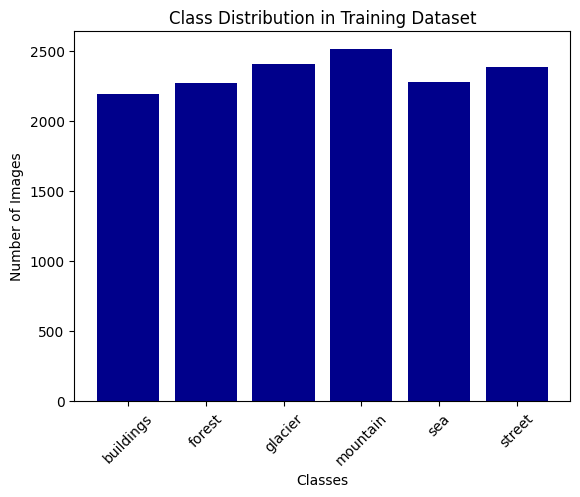

In [ ]:
# Function to check for class imbalance

def check_class_imbalance(paths):
    class_counts = {}
    total_images = 0

    for class_name, class_path in paths.items():  # Loop through the dictionary
        num_images = len(os.listdir(class_path))  # Count the number of images in the class directory
        class_counts[class_name] = num_images
        total_images += num_images

    # Print the counts for each class
    for class_name, count in class_counts.items():
        print(f"Class: {class_name}, Count: {count}, Percentage: {count / total_images * 100:.2f}%")

    print(f"Total Images: {total_images}")
    return class_counts

# Check for class imbalance in the training dataset
class_counts = check_class_imbalance(train_paths)

# Visualize class distribution
import matplotlib.pyplot as plt

plt.bar(class_counts.keys(), class_counts.values(), color='darkblue')
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Class Distribution in Training Dataset')
plt.xticks(rotation=45)
plt.show()



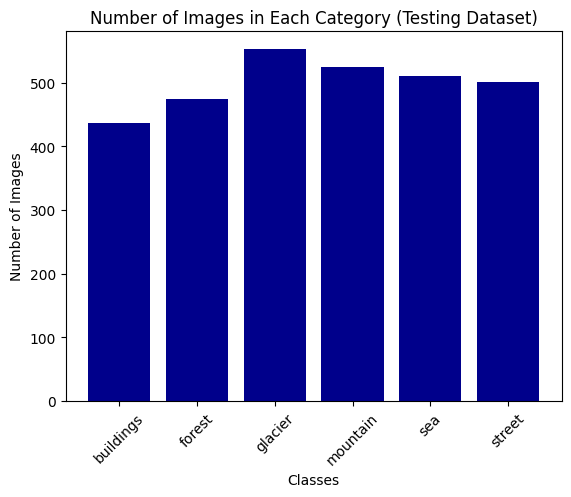

In [ ]:
# Plotting the number of images in testing dataset
plt.bar(test_category_counts.keys(), test_category_counts.values(), color='darkblue')
plt.title('Number of Images in Each Category (Testing Dataset)')
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Data augmentation steps for training set

data_gen = ImageDataGenerator(
    rescale=1.0/255,                 # Normalize pixel values to the range [0, 1]
    rotation_range=40,               # Randomly rotate images up to 40 degrees
    width_shift_range=0.2,           # Randomly shift images horizontally by up to 20% of the width
    height_shift_range=0.2,          # Randomly shift images vertically by up to 20% of the height
    shear_range=0.2,                 # Apply random shearing transformations
    zoom_range=0.2,                  # Randomly zoom into images by up to 20%
    horizontal_flip=True,            # Randomly flip images horizontally
    brightness_range=[0.8, 1.2],     # Adjust brightness to be between 80% and 120% of the original
    fill_mode='nearest',             # Fill missing pixels (after transformations) with the nearest pixel values
    validation_split=0.2             # Reserve 20% of the data for validation
)


# The training dataset is created by applying data augmentation and preprocessing transformations
# The images are resized to a uniform size of 224x224 pixels, loaded in batches of size 128, and the labels are represented as sparse categorical integers.
# 80% of the images are reserved for training purposes
train_ds = data_gen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=128,
    class_mode='sparse',
    subset='training'
)

# Data augmentation step for validation
val_gen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2
)

#The validation dataset is prepared using 20% of images from seg_train, resized and normalized like the training dataset, but without augmentation,
# and divided into batches of 128 with sparse categorical labels.
val_ds = val_gen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=128,
    class_mode='sparse',
    subset='validation'
)

# Data augmentation step for testing dataset
test_gen = ImageDataGenerator(rescale=1.0/255)

# Testing dataset from `seg_test`
test_ds = test_gen.flow_from_directory(
    test_dir,
   target_size=(224,224),
    batch_size=128,
    class_mode='sparse',
    shuffle=False
)


# Prediction dataset from `seg_pred` (unlabeled data)
pred_gen = ImageDataGenerator(rescale=1.0/255)
pred_ds = pred_gen.flow_from_directory(
    pred_dir,
   target_size=(224,224),
    batch_size=128,
    class_mode=None,  # No labels for predictions
    shuffle=False     # Ensure predictions are in order
)

Found 11230 images belonging to 6 classes.
Found 2804 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.
Found 7301 images belonging to 1 classes.


In [ ]:
print(f"Training dataset batches: {len(train_ds)}, Batch size: {train_ds.batch_size}")
print(f"Validation dataset batches: {len(val_ds)}, Batch size: {val_ds.batch_size}")
print(f"Testing dataset batches: {len(test_ds)}, Batch size: {test_ds.batch_size}")
print(f"Prediction dataset batches: {len(pred_ds)}, Batch size: {pred_ds.batch_size}")

Training dataset batches: 88, Batch size: 128
Validation dataset batches: 22, Batch size: 128
Testing dataset batches: 24, Batch size: 128
Prediction dataset batches: 58, Batch size: 128


In [ ]:
# Verify dataset shapes

for images, labels in train_ds:
    print(f"Images shape: {images.shape}")  # Expected: (batch_size, 224, 224, 3)
    print(f"Labels shape: {labels.shape}")  # Expected: (batch_size,)
    break

Images shape: (128, 224, 224, 3)
Labels shape: (128,)


In [ ]:
# Function to display random images from each category for train set

def display_random_images_from_categories(paths, num_images=6):
    for category, path in paths.items():
        image_files = os.listdir(path)# Get a list of image filenames in the directory
        selected_images = random.sample(image_files, min(num_images, len(image_files))) # Randomly selecting images

        # Plotting the selected images
        plt.figure(figsize=(15, 5)) #set the figure size
        plt.suptitle(f'Random Images from Category: {category}', fontsize=16)
        for i, image_name in enumerate(selected_images): #loop over selected images
            img_path = os.path.join(path, image_name)
            img = Image.open(img_path)

            plt.subplot(1, num_images, i + 1)
            plt.imshow(img)
            plt.axis('off')
            plt.title(category)

        plt.show()

# Displaying random 6 images from each category in the training dataset
display_random_images_from_categories(train_paths, num_images=6)


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Function to display random images from each category for test set

def display_random_images_from_categories(paths, num_images=6):
    for category, path in paths.items(): #Iterate over each category and its directory paths

        image_files = os.listdir(path)  # Get a list of image filenames in the directory

        selected_images = random.sample(image_files, min(num_images, len(image_files)))# Randomly select images

        # Plot the selected images
        plt.figure(figsize=(15, 5)) #set the figure size
        plt.suptitle(f'Random Images from Category: {category}', fontsize=16) #adding title to the figure
        for i, image_name in enumerate(selected_images): #loop over selected images
            img_path = os.path.join(path, image_name)
            img = Image.open(img_path) #Open the image using PIL

            plt.subplot(1, num_images, i + 1)
            plt.imshow(img)
            plt.axis('off')
            plt.title(category)

        plt.show()

# Displaying random 6 images from each category in the test dataset
display_random_images_from_categories(test_paths, num_images=6)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Defining a CNN model using the Sequential API

model = Sequential([
    # First Convolutional Block: Extract low-level features
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),  # 32 filters, 3x3 kernel, ReLU activation
    BatchNormalization(),  # Normalize activations to speed up convergence
    MaxPooling2D((2, 2)),  # Down-sample feature maps to reduce spatial dimensions

    # Second Convolutional Block: Deeper feature extraction
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    # Third Convolutional Block: Capture more complex patterns
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    # Fourth Convolutional Block: Learn high-level representations
    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    # Fifth Convolutional Block: Deepest level of feature extraction
    Conv2D(512, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    # Classification Layers
    GlobalAveragePooling2D(),  # Reduce spatial dimensions, output single vector per filter
    Dense(256, activation='relu', kernel_regularizer=l2(0.01)),  # Dense layer with L2 regularization
    Dropout(0.6),  # Prevent overfitting by dropping 60% of neurons
    Dense(len(class_names), activation='softmax')  # Output layer for multi-class classification
])

# Display the model architecture
model.summary()



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 222, 222, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 109, 109, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 52, 52, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 24, 24, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 24, 24, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 10, 10, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 10, 10, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 5, 5, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,705,414 (6.51 MB)

 Trainable params: 1,703,430 (6.50 MB)

 Non-trainable params: 1,984 (7.75 KB)

In [ ]:
# Compiling the model
model.compile(
    optimizer=Adam(learning_rate=1e-3),  # Use Adam optimizer with a reasonable learning rate
    loss='sparse_categorical_crossentropy',  # Sparse categorical crossentropy for integer labels
    metrics=['accuracy']  # Evaluating accuracy during training
)


In [ ]:
# Early stopping to stop training when validation accuracy stops improving

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=5,  # Number of epochs with no improvement to stop training
    restore_best_weights=True  # Restore model weights from the best epoch
)

# Reduce learning rate when validation loss plateaus

lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,  # Reduce learning rate by a factor of 0.5
    patience=3,  # Number of epochs to wait before reducing learning rate
    min_lr=1e-6  # Minimum learning rate
)

In [ ]:
# Training the model

history = model.fit(
    train_ds,  # Training dataset
    validation_data=val_ds,  # Validation dataset
    epochs=50,  # Number of epochs
    callbacks=[early_stopping, lr_scheduler]  # Include callbacks
)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


88/88 ━━━━━━━━━━━━━━━━━━━━ 185s 2s/step - accuracy: 0.4641 - loss: 4.5383 - val_accuracy: 0.2165 - val_loss: 4.5923 - learning_rate: 0.0010
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 199s 2s/step - accuracy: 0.6459 - loss: 2.3959 - val_accuracy: 0.2111 - val_loss: 3.2943 - learning_rate: 0.0010
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 197s 2s/step - accuracy: 0.6843 - loss: 1.5296 - val_accuracy: 0.1758 - val_loss: 3.7889 - learning_rate: 0.0010
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 198s 2s/step - accuracy: 0.7169 - loss: 1.1035 - val_accuracy: 0.2083 - val_loss: 3.1811 - learning_rate: 0.0010
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 174s 2s/step - accuracy: 0.7506 - loss: 0.8813 - val_accuracy: 0.3317 - val_loss: 2.5952 - learning_rate: 0.0010
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 203s 2s/step - accuracy: 0.7664 - loss: 0.7503 - val_accuracy: 0.4996 - val_loss: 1.5468 - learning_rate: 0.0010
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 200s 2s/step - accuracy: 0.7823 - loss: 0.6978 - val_accuracy: 0.73

In [ ]:
# Evaluate the model - test accuracy
# Provides a final evaluation of the model’s generalization ability.

loss, accuracy = model.evaluate(test_ds)
print(f'Test accuracy: {accuracy * 100:.2f}%')

24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 386ms/step - accuracy: 0.8910 - loss: 0.3385
Test accuracy: 89.00%


In [ ]:
# Evaluate the model - train accuracy
# Measures how well the model has learned the training data.

loss, accuracy = model.evaluate(train_ds)
print(f'Train accuracy: {accuracy * 100:.2f}%')

88/88 ━━━━━━━━━━━━━━━━━━━━ 177s 2s/step - accuracy: 0.9152 - loss: 0.2751
Train accuracy: 91.03%


In [ ]:
# Evaluate the model - Validation dataset
# Helps monitor the model's performance during training and tune hyperparameters (like learning rate, regularization, etc.).

loss, accuracy = model.evaluate(val_ds)
print(f'Validation accuracy: {accuracy * 100:.2f}%')

22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 246ms/step - accuracy: 0.8907 - loss: 0.3303
Validation accuracy: 89.87%


In [ ]:
# Save the model to Google Drive
model.save('/content/drive/MyDrive/Model1/best_model.h5')  # Save the entire model
print("Model saved to Google Drive.")

Model saved to Google Drive.


In [ ]:
import pickle

# Save the history object to a file
with open('/content/drive/MyDrive/model_history.pkl', 'wb') as f:
    pickle.dump(history.history, f)


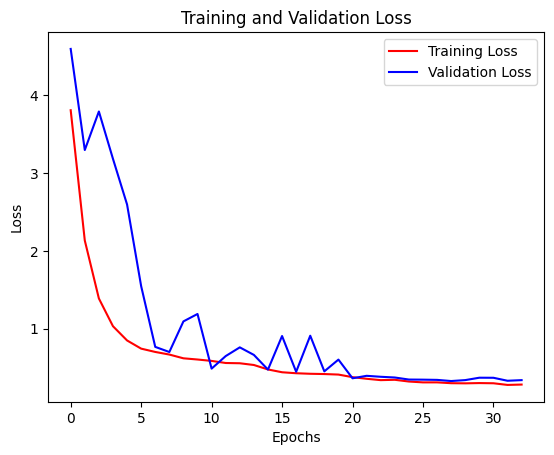

In [69]:
#Plot to visualize the training and validation loss trends over the epoch training
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.plot(epochs, loss, c="red", label="Training Loss")
plt.plot(epochs, val_loss, c="blue", label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

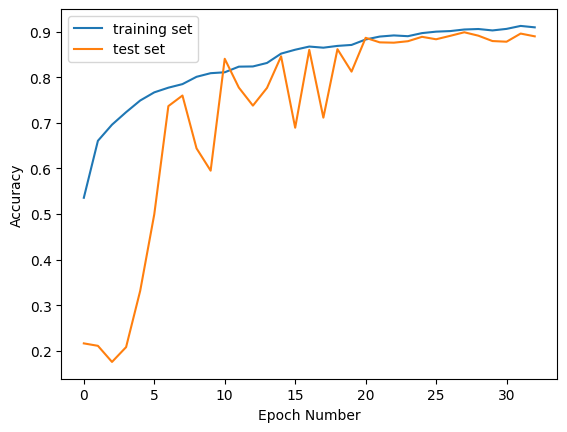

In [ ]:
#Plot to visualize the training and validation accuracy trends over the epoch training
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'], label='training set')
plt.plot(history.history['val_accuracy'], label='test set')
plt.legend()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


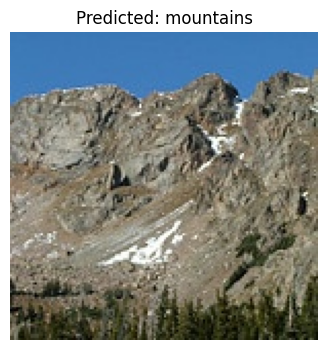

Predicted class for /content/seg_pred/seg_pred/10017.jpg: mountains


'mountains'

In [70]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def predict_img(img_path, model, class_names, target_size=(224, 224)):
    # Load the image
    img = load_img(img_path, target_size=target_size)  # Resize image to match model's input size
    original_img = load_img(img_path)  # Load original image for display

    # Preprocess the image
    img_array = img_to_array(img) / 255.0  # Convert image to array and normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Predict the class
    prediction = model.predict(img_array)
    predicted_class = class_names[np.argmax(prediction)]  # Get class with highest probability

    # Display the image with prediction
    plt.figure(figsize=(4, 4))
    plt.imshow(original_img)  # Show the original image
    plt.title(f"Predicted: {predicted_class}")
    plt.axis('off')
    plt.show()
    print(f"Predicted class for {img_path}: {predicted_class}")
    return predicted_class

# Define class names
class_names = ['buildings', 'forests', 'glaciers', 'mountains', 'seas', 'streets']
# Predict a single image
predict_img('/content/seg_pred/seg_pred/10017.jpg', model, class_names)




In [71]:
#Predict 15 random images
# Path to prediction folder
pred_folder = '/content/seg_pred/seg_pred'
target_size = (224, 224)  # Match the input size used during training

# Function to randomly select images, predict, and display the originals
def predict_random_original_images(model, folder_path, target_size, class_names, num_images=5):
    # Get all image files from the folder
    all_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.jpeg', '.png'))]

    # Randomly select a few images
    selected_files = random.sample(all_files, min(num_images, len(all_files)))

    predictions = []
    original_images = []
    file_names = []

    # Loop through each randomly selected file
    for file in selected_files:
        file_path = os.path.join(folder_path, file)

        # Load the original image for display
        original_img = load_img(file_path)  # Load the unprocessed image for visualization
        original_images.append(original_img)

        # Preprocess the image for prediction
        img = load_img(file_path, target_size=target_size)  # Resize for the model
        img_array = img_to_array(img) / 255.0  # Normalize pixel values
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

        # Predict the class
        pred = model.predict(img_array)
        pred_class = class_names[np.argmax(pred)]  # Get the predicted class

        predictions.append(pred_class)
        file_names.append(file)

    return predictions, original_images, file_names

class_names = ['buildings', 'forests', 'glaciers', 'mountains', 'seas', 'streets']

# Predict and display randomly selected images
predictions, original_images, file_names = predict_random_original_images(
    model, pred_folder, target_size, class_names, num_images=15  # Randomly choose 5 images
)

# Display results
for i in range(len(original_images)):
    plt.figure(figsize=(4, 4))
    plt.imshow(original_images[i])  # Display the original image
    plt.title(f"Predicted: {predictions[i]}")
    plt.axis('off')
    plt.show()
    print(f"File: {file_names[i]}, Prediction: {predictions[i]}")


24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 225ms/step


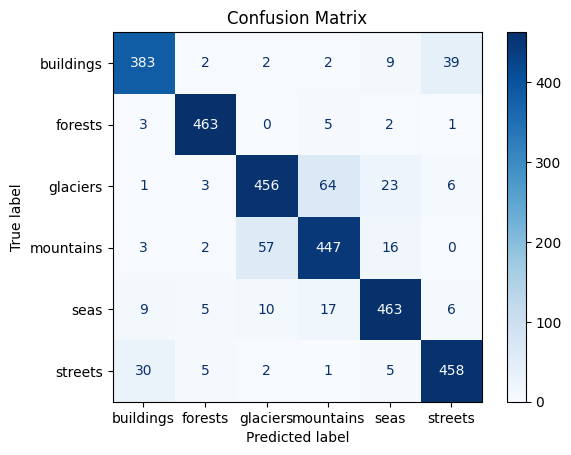

In [68]:
# Generating confusion matrix for the test set
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = np.argmax(model.predict(test_ds), axis=1)
y_true = test_ds.classes  # True labels

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()